In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from cleanser import *

In [4]:
fights = pd.read_csv('raw_total_fight_data.csv', sep=';')

In [5]:
#print(fights.columns)

In [6]:
cleanser = RawFightsCleanser()

In [7]:
fights = cleanser.cleanse_column_names(fights)

In [8]:
#print(fights.columns)

In [9]:
fights = cleanser.split_composite_columns(fights)

In [10]:
#print(fights.columns)

In [11]:
columns1 = fights.columns.copy()

In [12]:
fights = cleanser.load_and_cleanse('raw_total_fight_data.csv', sep=';')

In [13]:
#print(fights.columns)

In [14]:
columns2 = fights.columns.copy()

In [15]:
set(columns1) == set(columns2)

True

In [16]:
# To make it easier to read and deal with, let's add a loser column.

In [17]:
def find_loser(row):
    if row.winner == row.r_fighter:
        return row.b_fighter
    elif row.winner == row.b_fighter:
        return row.r_fighter
    else:
        return 'None'

In [18]:
fights['loser'] = fights.apply(find_loser, axis=1)

In [19]:
# Just curious to look at Royce Gracie's fights.

In [20]:
fights[(fights.r_fighter == 'Royce Gracie') | (fights.b_fighter == 'Royce Gracie')][['winner', 'win_by']]

,winner,win_by
4590,Matt Hughes,KO/TKO
5099,None,Other
5107,Royce Gracie,Submission
5109,Royce Gracie,Submission
5113,Royce Gracie,Submission
5117,Royce Gracie,Submission
5121,Royce Gracie,KO/TKO
5122,Royce Gracie,Submission
5124,Royce Gracie,Submission
5128,Royce Gracie,Submission


In [21]:
# just curious - how many fights include Gracies?
is_gracie = fights.apply(lambda row: 'gracie' in row.r_fighter.lower() or 'gracie' in row.b_fighter.lower(), axis=1)
fights[is_gracie][['r_fighter', 'b_fighter', 'winner', 'loser']]

,r_fighter,b_fighter,winner,loser
177,Alex Caceres,Kron Gracie,Kron Gracie,Alex Caceres
2818,Tim Kennedy,Roger Gracie,Tim Kennedy,Roger Gracie
3816,Matt Hughes,Renzo Gracie,Matt Hughes,Renzo Gracie
3875,Joey Beltran,Rolles Gracie,Joey Beltran,Rolles Gracie
4590,Matt Hughes,Royce Gracie,Matt Hughes,Royce Gracie
5099,Ken Shamrock,Royce Gracie,None,None
5107,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn
5109,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney
5113,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief
5117,Royce Gracie,Kimo Leopoldo,Royce Gracie,Kimo Leopoldo


In [22]:
# Let's write functions to get the fights for any given fighter, and their numeric record.

In [23]:
def get_fights_for_fighter(fighter_name, fights_df = fights):
    return fights_df[(fights_df.r_fighter == fighter_name) | (fights_df.b_fighter == fighter_name)]

In [24]:
def get_record(fighter_name, fights_df = fights):
    record = get_fights_for_fighter(fighter_name, fights_df)
    summary = {}
    summary['wins'] = (fights_df['winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['loser'] == fighter_name).sum()
    summary['draws'] = (((fights_df['r_fighter'] == fighter_name) | (fights_df['b_fighter'] == fighter_name) ) & (fights_df['winner'] == 'None')).sum()
    summary['win loss ratio'] = summary ['wins'] / (summary['wins'] + summary['losses'])
    
    return summary 

In [25]:
get_fights_for_fighter('Royce Gracie')[['winner', 'win_by']]

,winner,win_by
4590,Matt Hughes,KO/TKO
5099,None,Other
5107,Royce Gracie,Submission
5109,Royce Gracie,Submission
5113,Royce Gracie,Submission
5117,Royce Gracie,Submission
5121,Royce Gracie,KO/TKO
5122,Royce Gracie,Submission
5124,Royce Gracie,Submission
5128,Royce Gracie,Submission


In [26]:
print(get_record('Royce Gracie'))

{'wins': 11, 'losses': 1, 'draws': 1, 'win loss ratio': 0.9166666666666666}


In [27]:
print(get_record('Matt Hughes'))

{'wins': 18, 'losses': 7, 'draws': 0, 'win loss ratio': 0.72}


In [28]:
get_fights_for_fighter('Matt Hughes')[['winner', 'win_by', 'loser']]

,winner,win_by,loser
3441,Josh Koscheck,KO/TKO,Matt Hughes
3667,BJ Penn,KO/TKO,Matt Hughes
3742,Matt Hughes,Submission,Ricardo Almeida
3816,Matt Hughes,KO/TKO,Renzo Gracie
4029,Matt Hughes,Decision - Unanimous,Matt Serra
4231,Thiago Alves,KO/TKO,Matt Hughes
4313,Georges St-Pierre,Submission,Matt Hughes
4461,Matt Hughes,Decision - Unanimous,Chris Lytle
4502,Georges St-Pierre,KO/TKO,Matt Hughes
4536,Matt Hughes,KO/TKO,BJ Penn


In [29]:
get_fights_for_fighter('Georges St-Pierre')[['winner', 'win_by', 'loser']]

,winner,win_by,loser
793,Georges St-Pierre,Submission,Michael Bisping
2660,Georges St-Pierre,Decision - Split,Johny Hendricks
2923,Georges St-Pierre,Decision - Unanimous,Nick Diaz
3047,Georges St-Pierre,Decision - Unanimous,Carlos Condit
3552,Georges St-Pierre,Decision - Unanimous,Jake Shields
3644,Georges St-Pierre,Decision - Unanimous,Josh Koscheck
3835,Georges St-Pierre,Decision - Unanimous,Dan Hardy
3997,Georges St-Pierre,Decision - Unanimous,Thiago Alves
4092,Georges St-Pierre,KO/TKO,BJ Penn
4191,Georges St-Pierre,Decision - Unanimous,Jon Fitch


In [30]:
get_record('Georges St-Pierre')

{'wins': 20, 'losses': 2, 'draws': 0, 'win loss ratio': 0.9090909090909091}

In [31]:
get_record('Conor McGregor')

{'wins': 9, 'losses': 2, 'draws': 0, 'win loss ratio': 0.8181818181818182}

In [32]:
# Let's do some exploration of some attributes

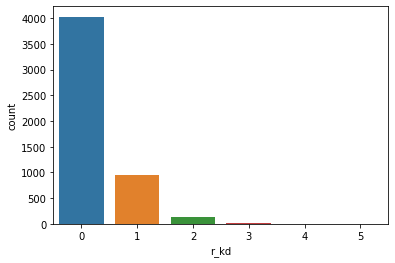

In [33]:
sns.countplot(data=fights, x='r_kd')

In [34]:
fights.r_kd.value_counts()

0    4029
1     960
2     133
3      18
5       2
4       2
Name: r_kd, dtype: int64

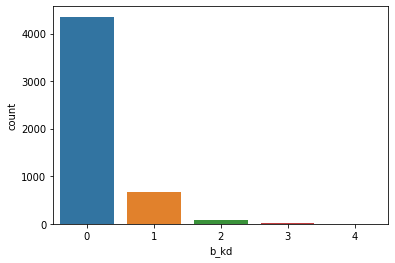

In [35]:
sns.countplot(fights.b_kd)

In [36]:
# Is the R or B player more likely to win?
# I forget, is one the favorite?

In [37]:
def winner_b_r(row):
    if row['winner'] == row.r_fighter:
        return 'r'
    elif row['winner'] == row.b_fighter:
        return 'b'
    else:
        return 'None' 
    

In [38]:
fights['r_b_winner'] = fights.apply(lambda row: winner_b_r(row), axis=1)

In [39]:
fights.head()[['r_fighter', 'b_fighter', 'winner', 'r_b_winner']]

,r_fighter,b_fighter,winner,r_b_winner
0,Henry Cejudo,Marlon Moraes,Henry Cejudo,r
1,Valentina Shevchenko,Jessica Eye,Valentina Shevchenko,r
2,Tony Ferguson,Donald Cerrone,Tony Ferguson,r
3,Jimmie Rivera,Petr Yan,Petr Yan,b
4,Tai Tuivasa,Blagoy Ivanov,Blagoy Ivanov,b


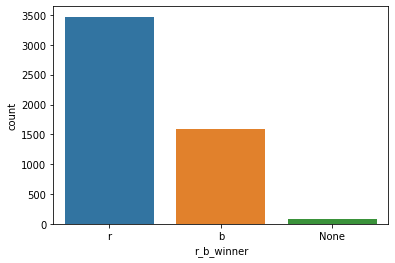

In [40]:
sns.countplot(fights.r_b_winner)

In [41]:
# Looks like R wins a lot more often the B

In [42]:
# Now some other columns

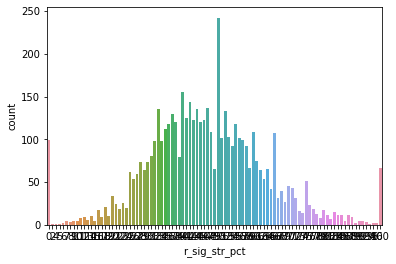

In [43]:
sns.countplot(data=fights, x="r_sig_str_pct")

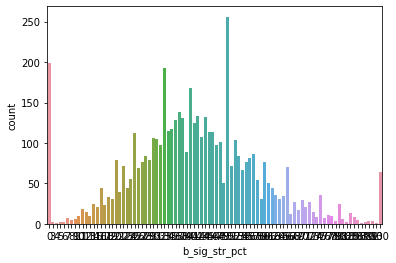

In [44]:
sns.countplot(fights.b_sig_str_pct)

In [45]:
fights.columns

Index(['r_fighter', 'b_fighter', 'r_kd', 'b_kd', 'r_sig_str', 'b_sig_str',
       'r_sig_str_pct', 'b_sig_str_pct', 'r_total_str', 'b_total_str',
       ...
       'b_ground_att', 'r_ground_suc', 'b_ground_suc', 'r_ground_ratio',
       'b_ground_ratio', 'r_ground_pct', 'b_ground_pct', 'ground_diff',
       'loser', 'r_b_winner'],
      dtype='object', length=120)

In [46]:
[c for c in fights.columns if '_pct' in c]

['r_sig_str_pct',
 'b_sig_str_pct',
 'r_td_pct',
 'b_td_pct',
 'r_total_str_pct',
 'b_total_str_pct',
 'r_head_pct',
 'b_head_pct',
 'r_body_pct',
 'b_body_pct',
 'r_leg_pct',
 'b_leg_pct',
 'r_distance_pct',
 'b_distance_pct',
 'r_clinch_pct',
 'b_clinch_pct',
 'r_ground_pct',
 'b_ground_pct']

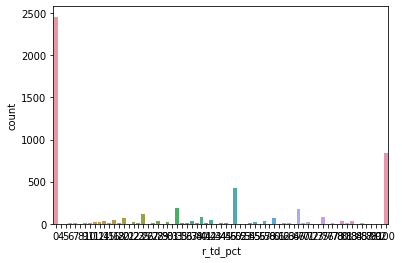

In [47]:
sns.countplot(fights.r_td_pct)

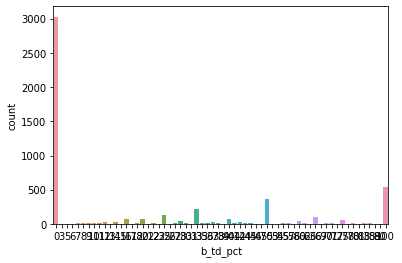

In [48]:
sns.countplot(fights.b_td_pct)

In [49]:
fights.r_td_pct.describe()

count    5144.000000
mean       32.610420
std        37.969679
min         0.000000
25%         0.000000
50%        16.000000
75%        60.000000
max       100.000000
Name: r_td_pct, dtype: float64

In [50]:
fights.r_td_pct.value_counts()

0      2456
100     837
50      426
33      189
66      177
       ... 
21        1
52        1
92        1
72        1
76        1
Name: r_td_pct, Length: 69, dtype: int64

In [51]:
# I have a feeling that between attempt, success, and percent/ratio columns, success is the most important.  The person who lands 5 out of 20 punches probably does better than the opponent who lands 1 out of 1.

In [52]:
success_columns = [c for c in fights.columns if '_suc' in c]

In [53]:
'''
for column in success_columns:
    print(column)
    sns.countplot(fights[column])
    plt.show()
'''
# None of these are normally distributed.  exponential / fat tail

'\nfor column in success_columns:\n    print(column)\n    sns.countplot(fights[column])\n    plt.show()\n'

In [54]:
# TODO:
# I wonder if some sort of different column would help.  Something simple like r_sig_strike - b_sig_strike.
# Could go back to the cleanser and have it do that.
# Then correlate that to wins.  Would that be logistic regression?
# That would answer the question of, given the data for the fight, can we predict the winner?  Not the question of, given the data on the fighters, can we predict the winner before the fight happens?

In [55]:
# TODO: significant columns
# One option is to simple remove the ones that are not significant
# TODO: See if sig_str is necessary; night need to focus on head and body
# TODO: maybe a statistical analysis of refs to see if each ref favors red or blue; only the refs that have more than say 30 fights
# to verify the hypothesis that the Referee column is not needed

In [56]:
diff_columns = [c for c in fights.columns if '_diff' in c]
diff_columns

['sig_str_diff',
 'total_str_diff',
 'td_diff',
 'head_diff',
 'body_diff',
 'leg_diff',
 'distance_diff',
 'clinch_diff',
 'ground_diff']

sig_str_diff


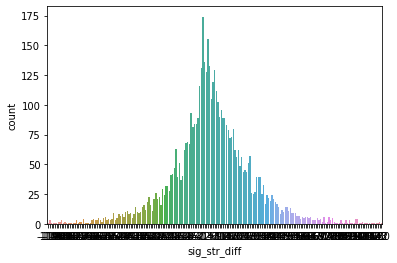

mean:   5.174572317262831
std:   24.95997665039605

total_str_diff


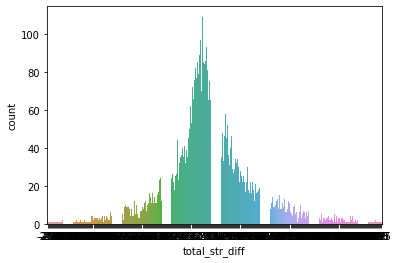

mean:   9.611003110419906
std:   45.75648972313963

td_diff


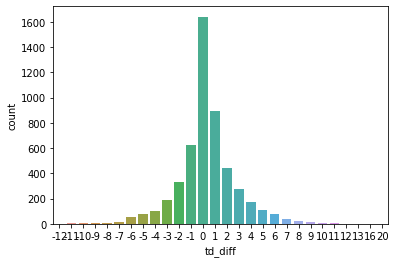

mean:   0.3495334370139969
std:   2.5062837179979782

head_diff


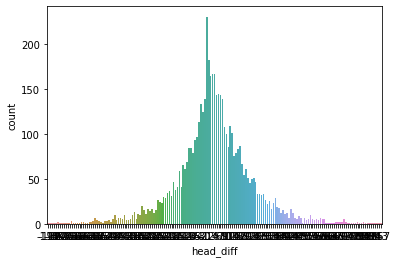

mean:   3.7323094867807156
std:   19.704231408512587

body_diff


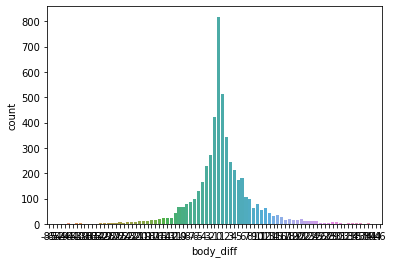

mean:   0.8505054432348367
std:   8.030154605225919

leg_diff


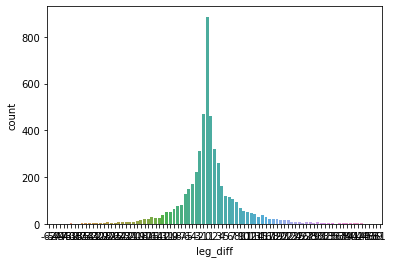

mean:   0.5917573872472783
std:   8.417927252287994

distance_diff


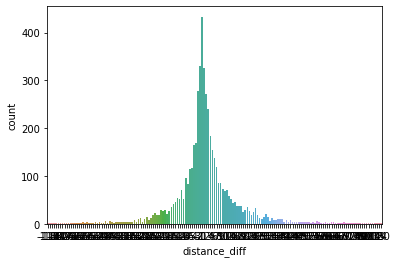

mean:   1.8596423017107309
std:   16.440600437509428

clinch_diff


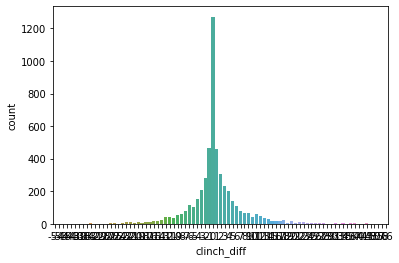

mean:   0.61450233281493
std:   7.4441671634335265

ground_diff


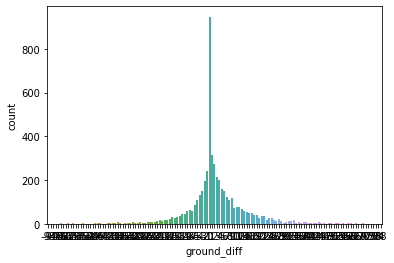

mean:   2.7004276827371694
std:   12.987118455702257



In [59]:
for column in diff_columns:
    print(column)
    sns.countplot(fights[column])
    plt.show()
    print('mean:  ', fights[column].mean())
    print('std:  ', fights[column].std())
    print()

In [58]:
for column in diff_columns:
    print(column)
    print(fights[column].value_counts().head(10))

sig_str_diff
 0    174
 3    155
 1    136
 4    133
-1    131
 7    129
 2    128
 6    119
-2    116
 8    112
Name: sig_str_diff, dtype: int64
total_str_diff
 3    109
 1     97
 7     93
 0     89
 6     86
-2     85
 4     85
 5     84
-4     82
 8     81
Name: total_str_diff, dtype: int64
td_diff
 0    1640
 1     898
-1     624
 2     442
-2     335
 3     278
-3     191
 4     174
 5     113
-4     106
Name: td_diff, dtype: int64
head_diff
 0    230
 1    182
 3    167
 4    166
 2    164
 6    144
 5    143
 7    143
 8    139
-1    139
Name: head_diff, dtype: int64
body_diff
 0    818
 1    512
-1    424
 2    345
-2    271
 3    243
-3    229
 4    214
 6    182
 5    175
Name: body_diff, dtype: int64
leg_diff
 0    886
-1    472
 1    463
 2    319
-2    310
 3    262
-3    221
-4    172
 4    162
-5    149
Name: leg_diff, dtype: int64
distance_diff
 0    433
-1    330
 1    326
-2    277
 2    272
 3    240
 4    183
-3    170
-4    166
 5    155
Name: distance_diff, dtype

In [ ]:
#The success columns are "tail" distributions, but the diff columns are bell curves.  That is weird.

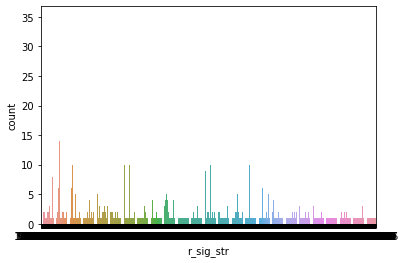

In [75]:
sns.countplot(fights.r_sig_str)

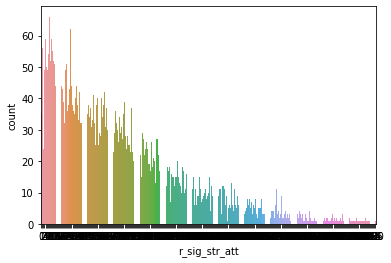

In [80]:
sns.countplot(fights.r_sig_str_att)

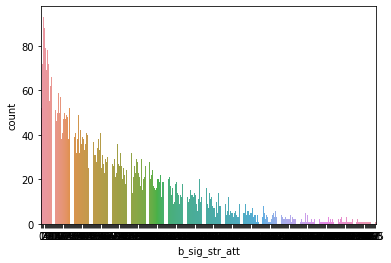

In [81]:
sns.countplot(fights.b_sig_str_att)

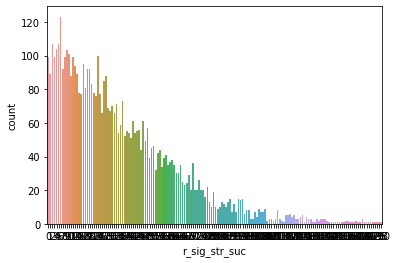

In [77]:
sns.countplot(fights.r_sig_str_suc)

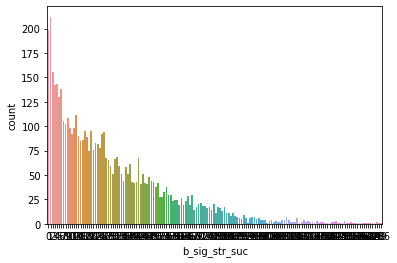

In [82]:
sns.countplot(fights.b_sig_str_suc)

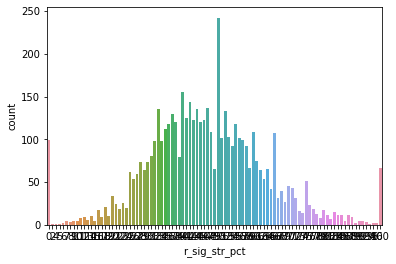

In [78]:
sns.countplot(fights.r_sig_str_pct)

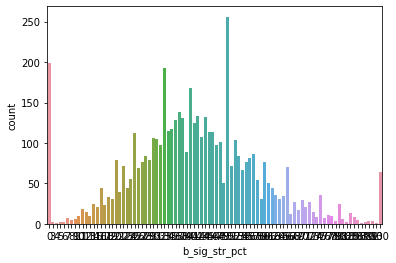

In [83]:
sns.countplot(fights.b_sig_str_pct)

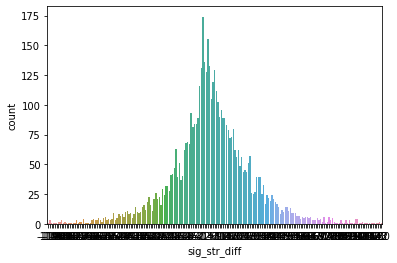

In [79]:
sns.countplot(fights.sig_str_diff)

In [84]:
cleanser.expand_column_names('sig_str')

['r_sig_str_att',
 'b_sig_str_att',
 'r_sig_str_suc',
 'b_sig_str_suc',
 'r_sig_str_ratio',
 'b_sig_str_ratio',
 'r_sig_str_pct',
 'b_sig_str_pct',
 'sig_str_diff']

In [91]:
diff_columns

['sig_str_diff',
 'total_str_diff',
 'td_diff',
 'head_diff',
 'body_diff',
 'leg_diff',
 'distance_diff',
 'clinch_diff',
 'ground_diff']

In [102]:
sig_str = cleanser.expand_column_names('sig_str')
total_str = cleanser.expand_column_names('total_str')
td = cleanser.expand_column_names('td')
head =  cleanser.expand_column_names('head')
body = cleanser.expand_column_names('body')
leg = cleanser.expand_column_names('leg')
distance = cleanser.expand_column_names('distance')
clinch = cleanser.expand_column_names('clinch')
ground = cleanser.expand_column_names('ground')

In [110]:
cols_to_graph = total_str + td + head + body + leg + distance + clinch + ground

In [112]:
cols_to_graph

['r_total_str_att',
 'b_total_str_att',
 'r_total_str_suc',
 'b_total_str_suc',
 'r_total_str_ratio',
 'b_total_str_ratio',
 'r_total_str_pct',
 'b_total_str_pct',
 'total_str_diff',
 'r_td_att',
 'b_td_att',
 'r_td_suc',
 'b_td_suc',
 'r_td_ratio',
 'b_td_ratio',
 'r_td_pct',
 'b_td_pct',
 'td_diff',
 'r_head_att',
 'b_head_att',
 'r_head_suc',
 'b_head_suc',
 'r_head_ratio',
 'b_head_ratio',
 'r_head_pct',
 'b_head_pct',
 'head_diff',
 'r_body_att',
 'b_body_att',
 'r_body_suc',
 'b_body_suc',
 'r_body_ratio',
 'b_body_ratio',
 'r_body_pct',
 'b_body_pct',
 'body_diff',
 'r_leg_att',
 'b_leg_att',
 'r_leg_suc',
 'b_leg_suc',
 'r_leg_ratio',
 'b_leg_ratio',
 'r_leg_pct',
 'b_leg_pct',
 'leg_diff',
 'r_distance_att',
 'b_distance_att',
 'r_distance_suc',
 'b_distance_suc',
 'r_distance_ratio',
 'b_distance_ratio',
 'r_distance_pct',
 'b_distance_pct',
 'distance_diff',
 'r_clinch_att',
 'b_clinch_att',
 'r_clinch_suc',
 'b_clinch_suc',
 'r_clinch_ratio',
 'b_clinch_ratio',
 'r_clinch_p

In [113]:
len(cols_to_graph)

72

In [104]:
'''for column in body:
    print(f'\n{column}')
    sns.countplot(data=fights, x=column)
    plt.show()
'''

"for column in body:\n    print(f'\n{column}')\n    sns.countplot(data=fights, x=column)\n    plt.show()\n"


r_total_str_att


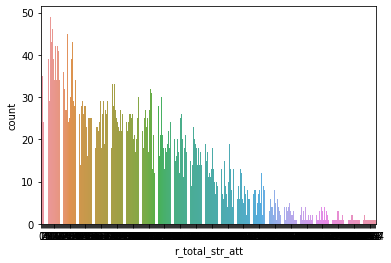


b_total_str_att


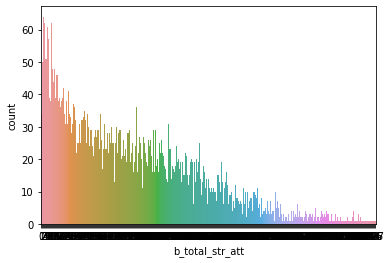


r_total_str_suc


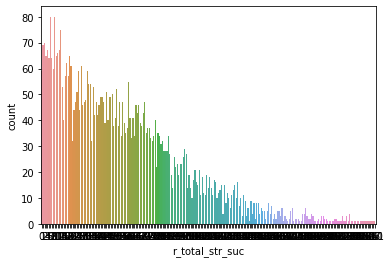


b_total_str_suc


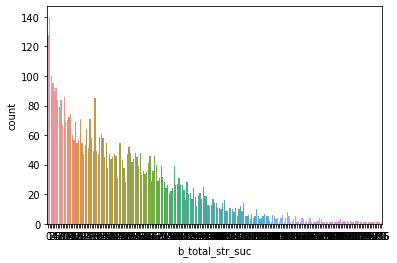


r_total_str_ratio


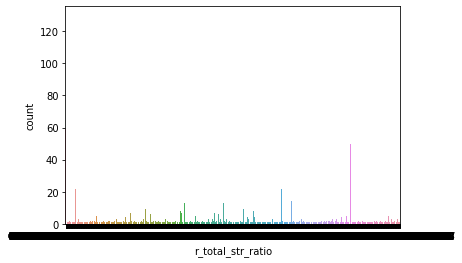


b_total_str_ratio


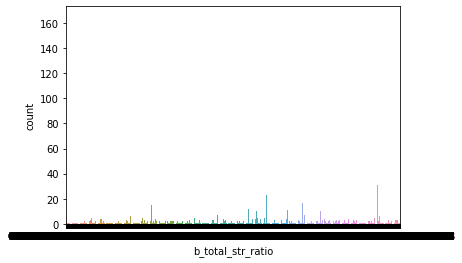


r_total_str_pct


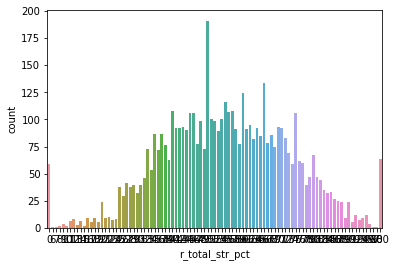


b_total_str_pct


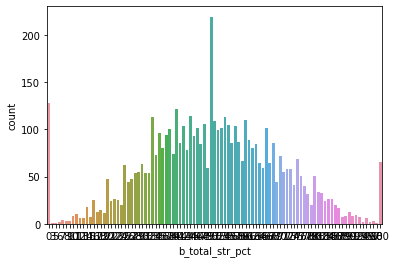


total_str_diff


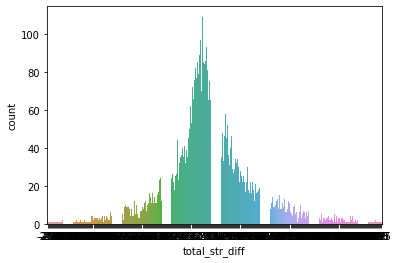


r_td_att


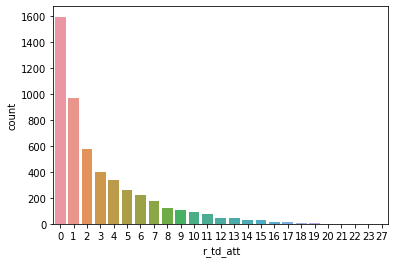


b_td_att


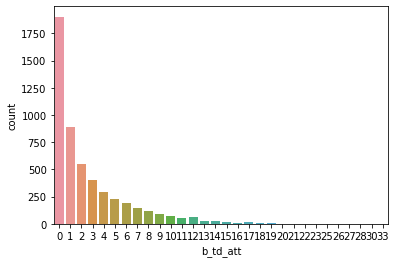


r_td_suc


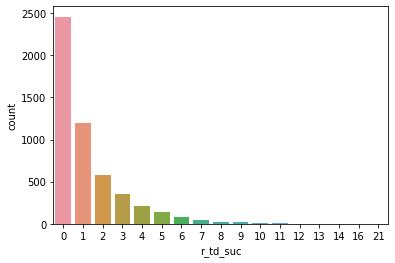


b_td_suc


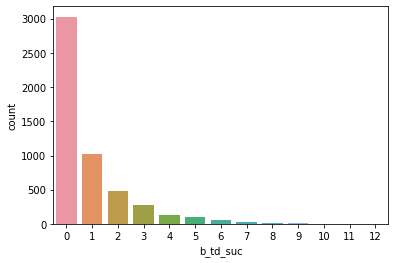


r_td_ratio


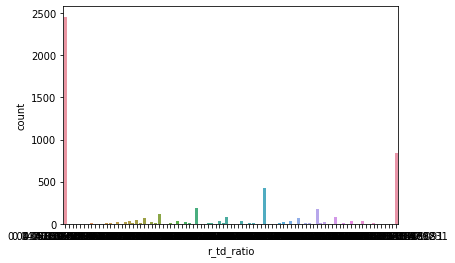


b_td_ratio


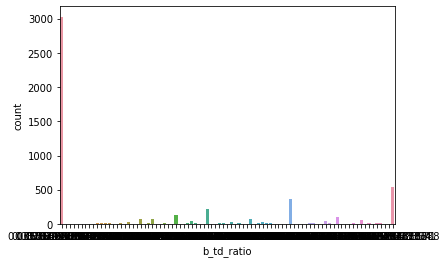


r_td_pct


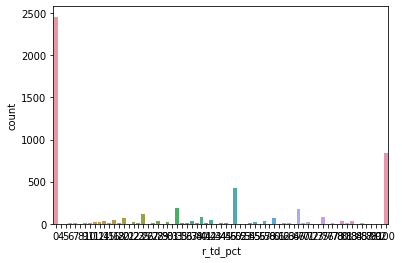


b_td_pct


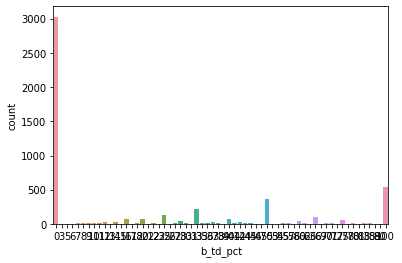


td_diff


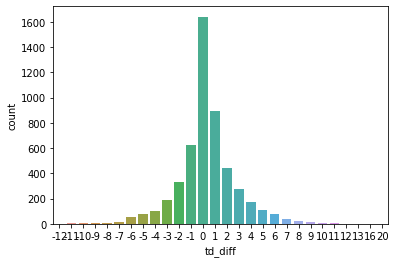


r_head_att


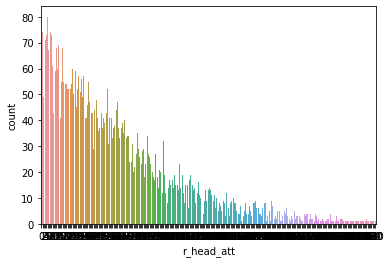


b_head_att


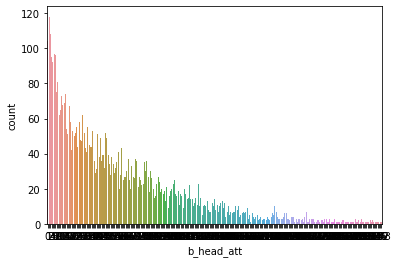


r_head_suc


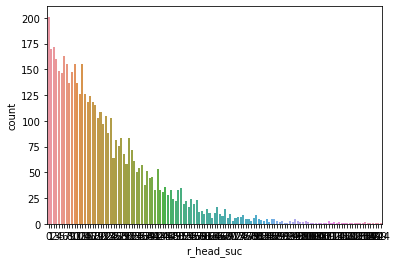


b_head_suc


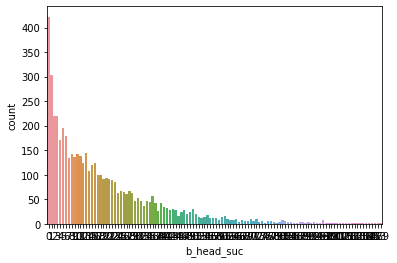


r_head_ratio


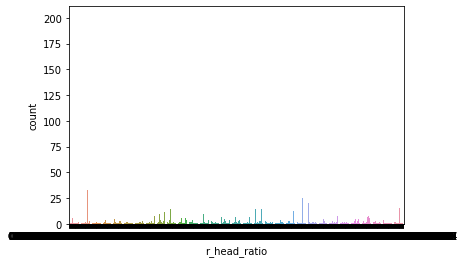


b_head_ratio


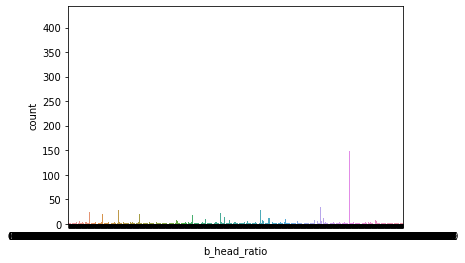


r_head_pct


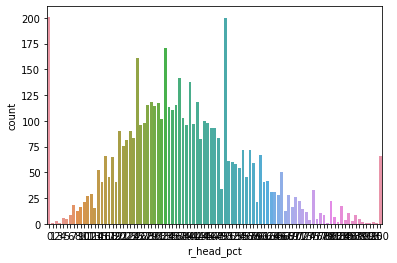


b_head_pct


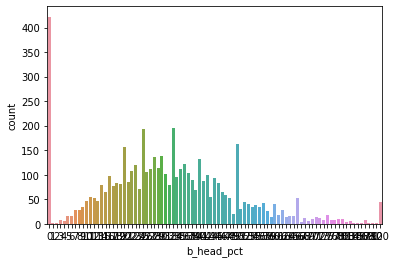


head_diff


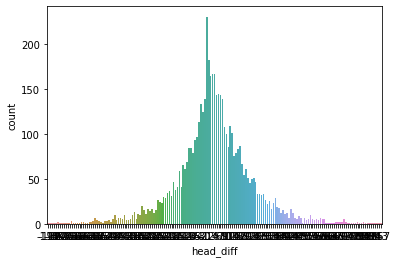


r_body_att


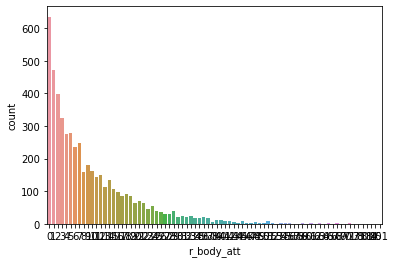


b_body_att


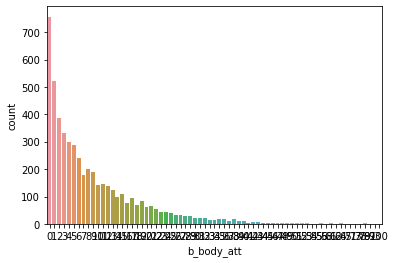


r_body_suc


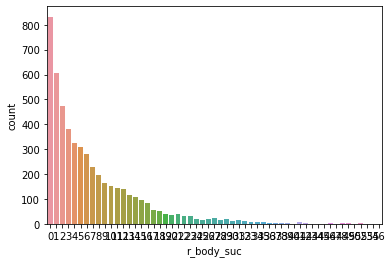


b_body_suc


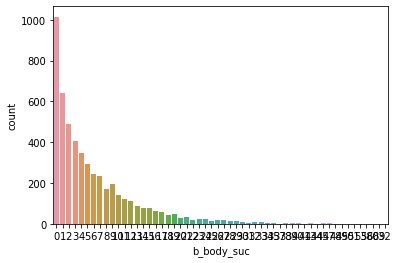


r_body_ratio


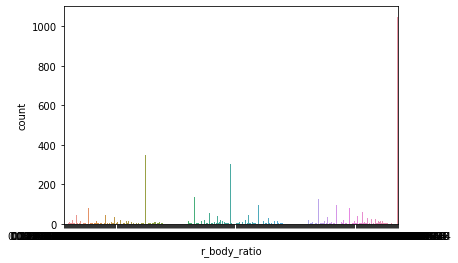


b_body_ratio


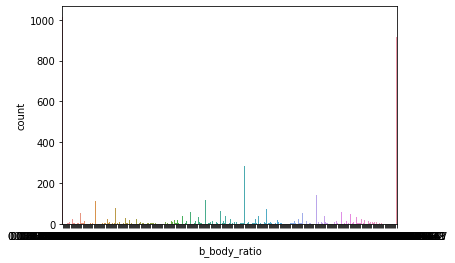


r_body_pct


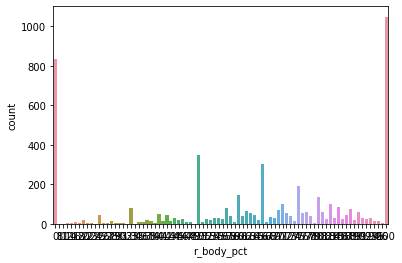


b_body_pct


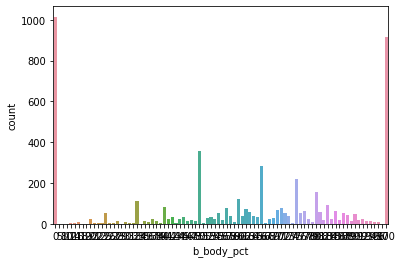


body_diff


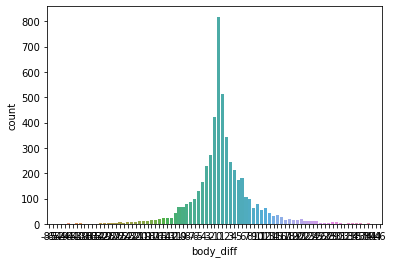


r_leg_att


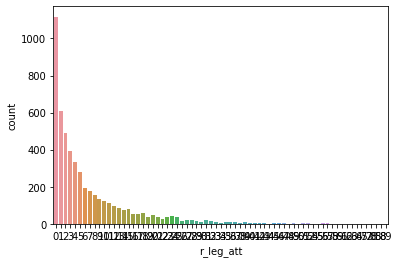


b_leg_att


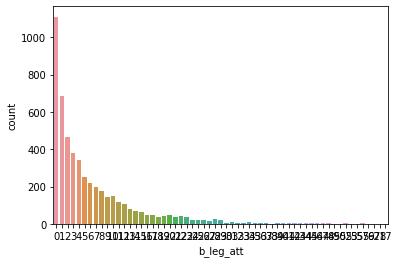


r_leg_suc


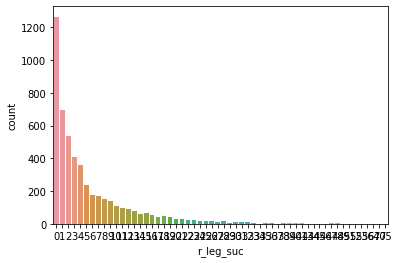


b_leg_suc


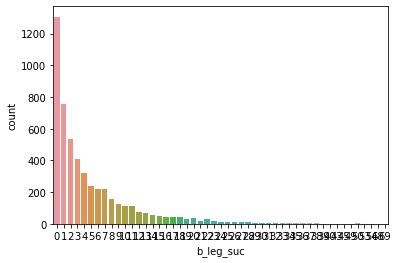


r_leg_ratio


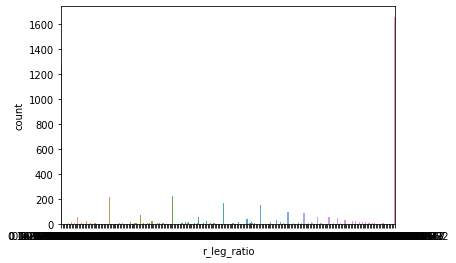


b_leg_ratio


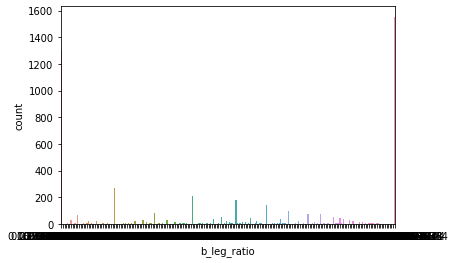


r_leg_pct


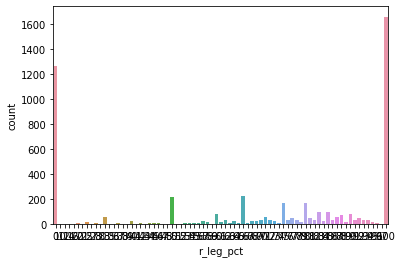


b_leg_pct


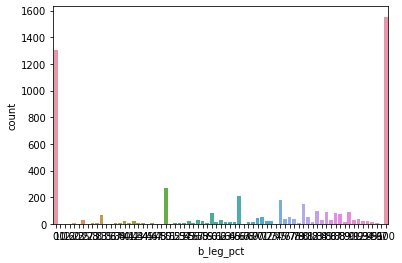


leg_diff


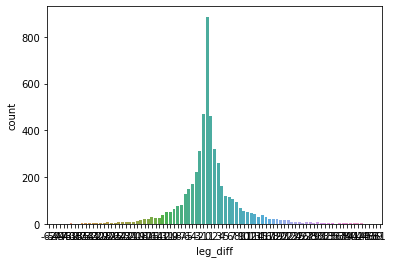


r_distance_att


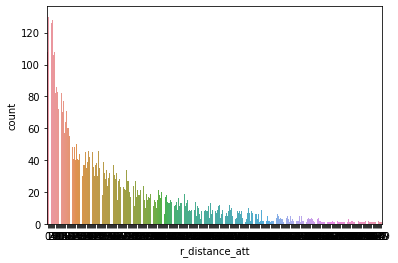


b_distance_att


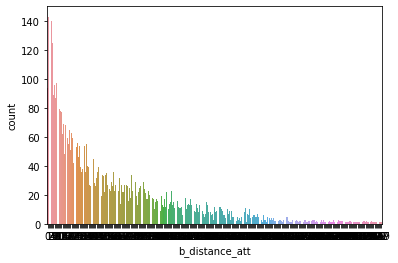


r_distance_suc


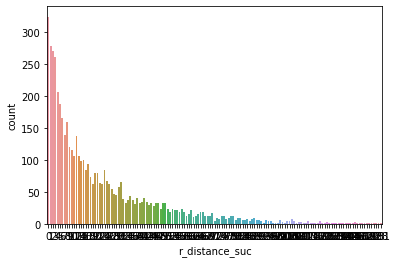


b_distance_suc


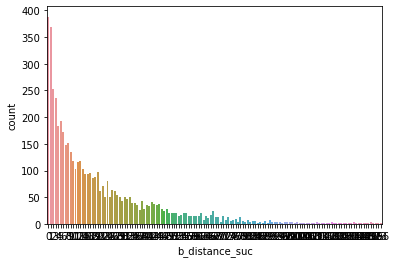


r_distance_ratio


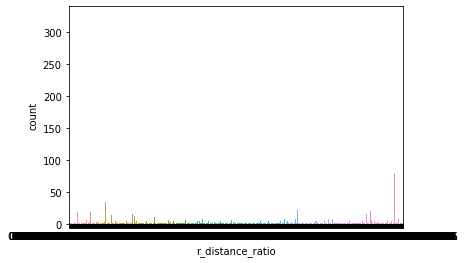


b_distance_ratio


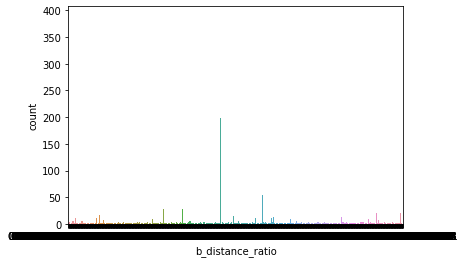


r_distance_pct


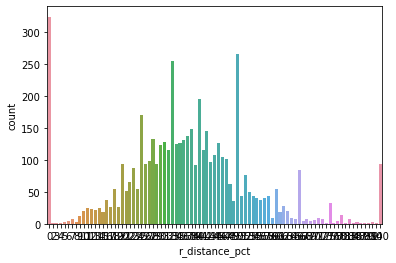


b_distance_pct


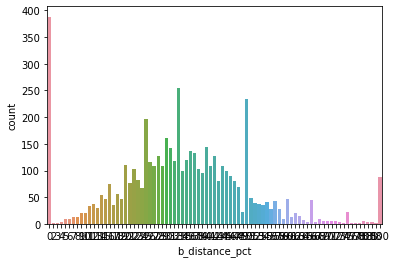


distance_diff


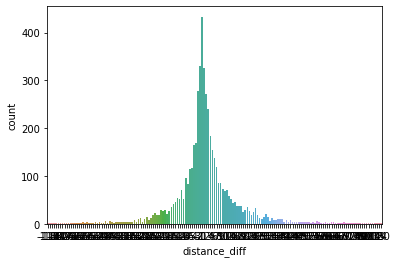


r_clinch_att


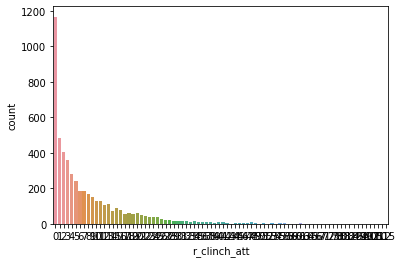


b_clinch_att


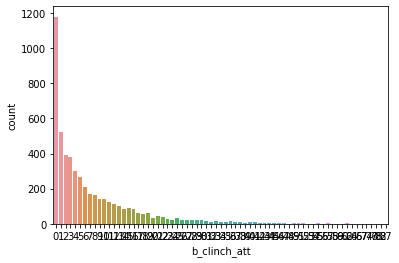


r_clinch_suc


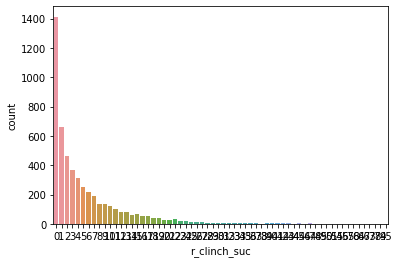


b_clinch_suc


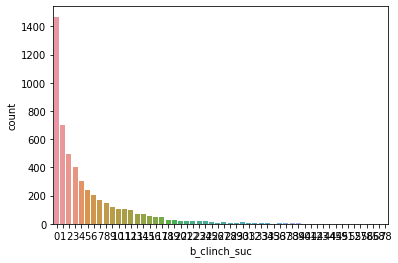


r_clinch_ratio


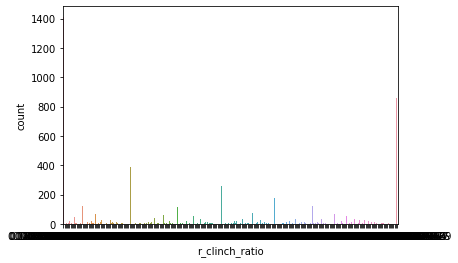


b_clinch_ratio


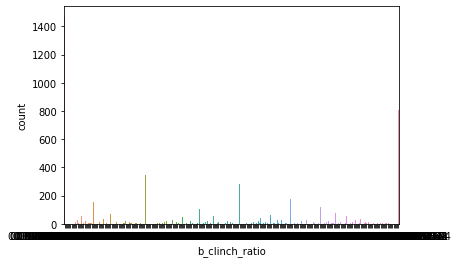


r_clinch_pct


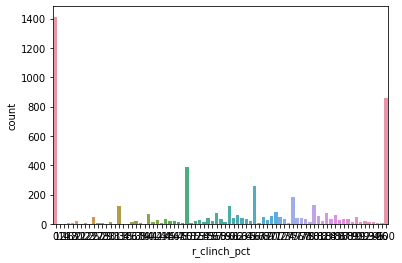


b_clinch_pct


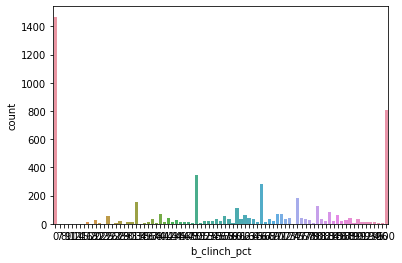


clinch_diff


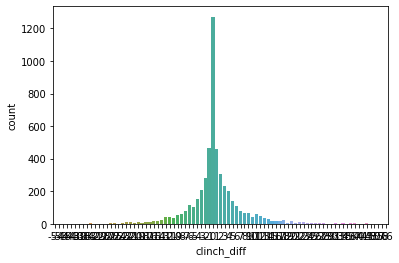


r_ground_att


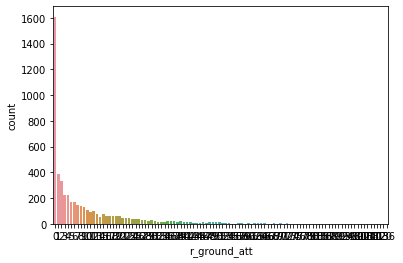


b_ground_att


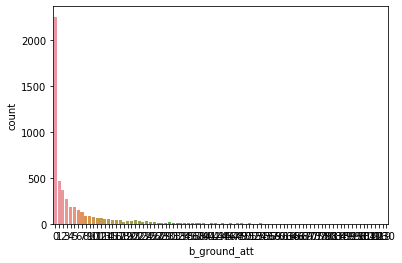


r_ground_suc


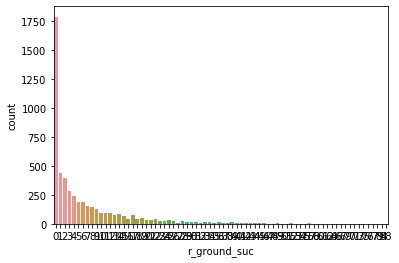


b_ground_suc


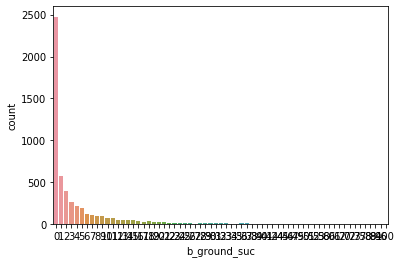


r_ground_ratio


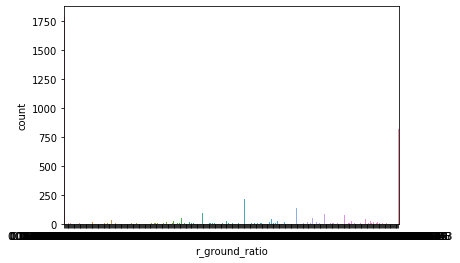


b_ground_ratio


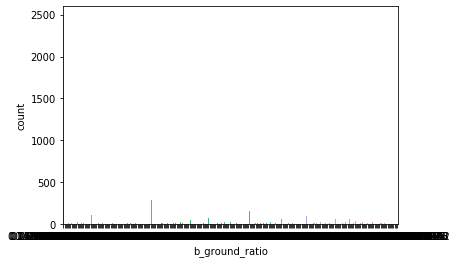


r_ground_pct


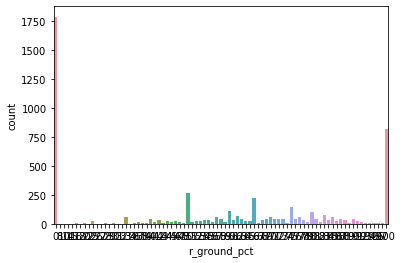


b_ground_pct


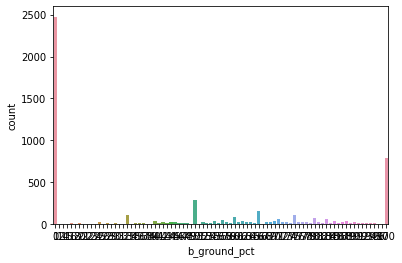


ground_diff


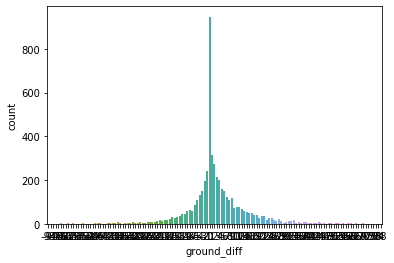

In [114]:
for column in cols_to_graph:
    print(f'\n{column}')
    sns.countplot(data=fights, x=column)
    plt.show()

It is strange that the distribution for every strike etc. is "long tail", for both sides, but the distribution for the 
difference is bell curve ish.
Why would the distro for the stats be that way anyway?  A lot of people landing few or no punches, and some landing more,
a few landing a huge amount.  It is this way for both red and blue.  I wonder what mechanism would cause that.

Hypotheses:
1 The distribution for how long matches last is exponential / fat tail.  This would give vastly more time for landing strikes in some fights that for others.
To test this, look and see if you can find out how long fights lasted.

2 Some are more focused on striking and some on grappling.  There are fewer stats for grappling.
To test this, look again at stats and see what is there for grappling.  There is a "td" state for takedowns.  See if there is anything else, and if we can tell if a fight is more grappling focused or strike focused.
Since the "td" stats are also "tail" distributed, I suspect this hypothesis will not be the reason.

In [ ]:
# How can I found the length of time a fight lasts?

In [124]:
fights[['last_round', 'last_round_time', 'format', 'fight_type']].head(20)

,last_round,last_round_time,format,fight_type
0,3,4:51,5 Rnd (5-5-5-5-5),UFC Bantamweight Title Bout
1,2,0:26,5 Rnd (5-5-5-5-5),UFC Women's Flyweight Title Bout
2,2,5:00,3 Rnd (5-5-5),Lightweight Bout
3,3,5:00,3 Rnd (5-5-5),Bantamweight Bout
4,3,5:00,3 Rnd (5-5-5),Heavyweight Bout
5,3,5:00,3 Rnd (5-5-5),Women's Strawweight Bout
6,3,5:00,3 Rnd (5-5-5),Bantamweight Bout
7,3,5:00,3 Rnd (5-5-5),Women's Strawweight Bout
8,1,4:06,3 Rnd (5-5-5),Featherweight Bout
9,3,5:00,3 Rnd (5-5-5),Women's Strawweight Bout


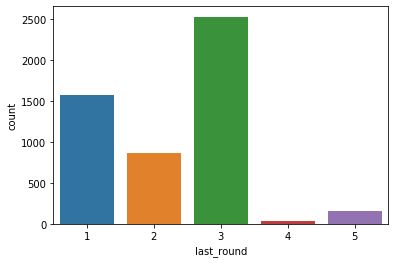

In [117]:
sns.countplot(fights.last_round)

In [118]:
fights.last_round_time.value_counts()

5:00     2315
4:59       32
3:00       29
1:54       23
2:38       20
         ... 
5:08        1
10:05       1
5:57        1
9:56        1
15:00       1
Name: last_round_time, Length: 333, dtype: int64

In [119]:
fights.format.value_counts()

3 Rnd (5-5-5)           4502
5 Rnd (5-5-5-5-5)        423
1 Rnd + OT (12-3)         79
No Time Limit             37
3 Rnd + OT (5-5-5-5)      22
1 Rnd (20)                20
1 Rnd + 2OT (15-3-3)      20
2 Rnd (5-5)               11
1 Rnd (15)                 8
1 Rnd (10)                 6
1 Rnd (12)                 4
1 Rnd + OT (30-5)          3
1 Rnd + OT (15-3)          2
1 Rnd (18)                 2
1 Rnd + OT (30-3)          1
1 Rnd (30)                 1
1 Rnd + 2OT (24-3-3)       1
1 Rnd + OT (31-5)          1
1 Rnd + OT (27-3)          1
Name: format, dtype: int64

In [129]:
# I can make guesses about what each row above means, but I don't think I can be certain about all of them.
# It would probably take a long time to try to convert each one to a time limit.
# The benefit seems low.  All it would do is confirm or rule out a hypothesis and probably not affect the outcome
# of the analysis.
# => For now, continue with the plan to do logistic regression on the "diff" columns. (8/15/2020)
# Afterward, come back and go down this rabbit trail.

In [128]:
fights[fights.format == 'No Time Limit'] [['last_round', 'last_round_time', 'format', 'fight_type', 'r_fighter', 'b_fighter', 'winner', 'loser']]

,last_round,last_round_time,format,fight_type,r_fighter,b_fighter,winner,loser
5107,1,15:49,No Time Limit,UFC 4 Tournament Title Bout,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn
5108,1,0:52,No Time Limit,Open Weight Bout,Dan Severn,Marcus Bossett,Dan Severn,Marcus Bossett
5109,1,5:32,No Time Limit,Open Weight Bout,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney
5110,1,1:45,No Time Limit,Open Weight Bout,Dan Severn,Anthony Macias,Dan Severn,Anthony Macias
5111,1,4:47,No Time Limit,Open Weight Bout,Steve Jennum,Melton Bowen,Steve Jennum,Melton Bowen
5112,1,2:44,No Time Limit,Open Weight Bout,Keith Hackney,Joe Son,Keith Hackney,Joe Son
5113,1,3:49,No Time Limit,Open Weight Bout,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief
5114,1,2:13,No Time Limit,Open Weight Bout,Guy Mezger,Jason Fairn,Guy Mezger,Jason Fairn
5115,1,1:27,No Time Limit,UFC 3 Tournament Title Bout,Steve Jennum,Harold Howard,Steve Jennum,Harold Howard
5116,1,4:34,No Time Limit,Open Weight Bout,Ken Shamrock,Felix Lee Mitchell,Ken Shamrock,Felix Lee Mitchell
